# Problem Statement - Perform segmentation on the basis of customers creditworthiness using clustering techniques

We want to perform analysis in predicting the creditworthiness(segmentation) of a customer on the German Credit data. This is publically available at the UCI machine-learning repository (M. Lichman, 2013) is being used for the analysis. The data consist of 1000 samples with data available across 21 variables related to the credit process. We will be using the below clustering algorithms - Kmeans, Hierarchial and DBSCAN.

## What is Clustering?

Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.

Some properties of clusters are:
- data points in a cluster should be similar to each other. 
- data points from different clusters should be as different as possible.

## 1. Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=(UserWarning,FutureWarning))
from sklearn import preprocessing
from sklearn import preprocessing
import statsmodels.api as sm
from scipy import stats
import plotly.offline as py 
import plotly.graph_objs as go
import plotly.tools as tls  
from collections import Counter 


## 2. Load the data

In [2]:
#select the useful columns only
cols = ["Existing_Account_Status","Month_Duration","Credit_History","Purpose","Credit_Amount","Saving_Acount","Present_Employment","Instalment_Rate","Sex","Guarantors","Residence","Property","Age","Installment","Housing","Existing_Credits","Job","Number_People","Telephone","Foreign_Worker","Status"]

In [3]:
df = pd.read_csv('german.data',
                 header=None,
                 delim_whitespace=True,
                 names=cols
                )
df.head(2)


,Existing_Account_Status,Month_Duration,Credit_History,Purpose,Credit_Amount,Saving_Acount,Present_Employment,Instalment_Rate,Sex,Guarantors,...,Property,Age,Installment,Housing,Existing_Credits,Job,Number_People,Telephone,Foreign_Worker,Status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2


## 3. Exploratory Data Analysis

In [4]:
df.shape

(1000, 21)

There are 1000 observations and 21 columns. 'Status' is the independent variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Existing_Account_Status  1000 non-null   object
 1   Month_Duration           1000 non-null   int64 
 2   Credit_History           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit_Amount            1000 non-null   int64 
 5   Saving_Acount            1000 non-null   object
 6   Present_Employment       1000 non-null   object
 7   Instalment_Rate          1000 non-null   int64 
 8   Sex                      1000 non-null   object
 9   Guarantors               1000 non-null   object
 10  Residence                1000 non-null   int64 
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  Installment              1000 non-null   object
 14  Housing                  1000 non-null   

In [6]:
#map status = 1 -> 1(Good Credit) and 2 -> 0(Bad Credit)
df['Status_new'] = np.where(df['Status'] == 2, 0,1)
df.drop('Status',axis=1,inplace=True)
df.head(5)

,Existing_Account_Status,Month_Duration,Credit_History,Purpose,Credit_Amount,Saving_Acount,Present_Employment,Instalment_Rate,Sex,Guarantors,...,Property,Age,Installment,Housing,Existing_Credits,Job,Number_People,Telephone,Foreign_Worker,Status_new
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


In [7]:
#extract the discrete numeric variables 
df_num = df.select_dtypes(np.number)
df_num.head(2)

,Month_Duration,Credit_Amount,Instalment_Rate,Residence,Age,Existing_Credits,Number_People,Status_new
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,0


In [8]:
#extract the continuous numeric variables 
df_cont = df.select_dtypes('float')
df_cont.head(2)

""
0
1


There are no continuous variables

In [9]:
#extract the continuous numeric variables 
df_cat = df.select_dtypes('object')
df_cat.head()

,Existing_Account_Status,Credit_History,Purpose,Saving_Acount,Present_Employment,Sex,Guarantors,Property,Installment,Housing,Job,Telephone,Foreign_Worker
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


There are 13 categorical variables.

In [10]:
df['Status_new'].value_counts()

1    700
0    300
Name: Status_new, dtype: int64

Status_new = '1' means good credit and Status_new = '0' means bad credit.

There are a total of 700 (70 %) good loans and 300 (30 %) bad loans in the German credit dataset. The detailed summary of all the variables is provided in the above table.

In [11]:
df.describe()

,Month_Duration,Credit_Amount,Instalment_Rate,Residence,Age,Existing_Credits,Number_People,Status_new
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [12]:
df_num.nunique()

Month_Duration       33
Credit_Amount       921
Instalment_Rate       4
Residence             4
Age                  53
Existing_Credits      4
Number_People         2
Status_new            2
dtype: int64

In [13]:
df.isna().sum()

Existing_Account_Status    0
Month_Duration             0
Credit_History             0
Purpose                    0
Credit_Amount              0
Saving_Acount              0
Present_Employment         0
Instalment_Rate            0
Sex                        0
Guarantors                 0
Residence                  0
Property                   0
Age                        0
Installment                0
Housing                    0
Existing_Credits           0
Job                        0
Number_People              0
Telephone                  0
Foreign_Worker             0
Status_new                 0
dtype: int64

There are no missing values in the dataset.

## Visualization

### Univariate Analysis

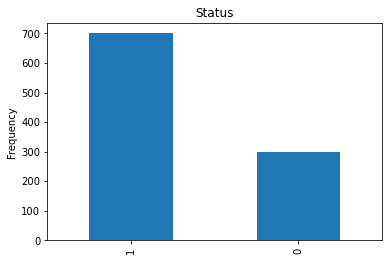

In [14]:
#target variable distribution
df['Status_new'].value_counts().plot.bar()
plt.ylabel('Frequency')
plt.title('Status')
plt.show()

Dataset looks imbalanced.

#### Discrete Variables

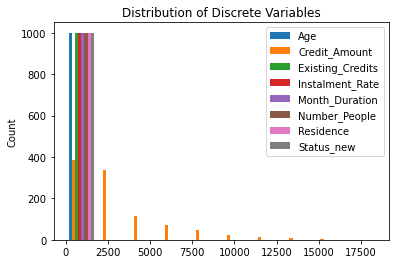

In [15]:
#distribution of discrete variables
features = df_num.columns.difference(['Status'])
ls = list(features)
fig, ax1 = plt.subplots()
ax1.hist(df_num, label=ls)
ax1.set_ylabel("Count")
ax1.set_title("Distribution of Discrete Variables")
plt.legend(loc='best') 
plt.show()

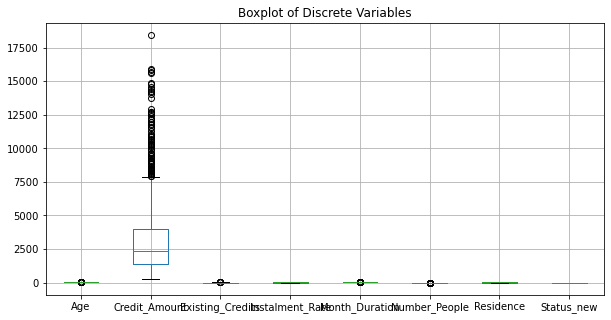

In [16]:
#boxplot of discrete variables
plt.figure(figsize=(10, 5))
ax = df_num.boxplot(column=ls)
ax.set_title('Boxplot of Discrete Variables')
plt.show()

We can see there are outliers in the numeric variables.

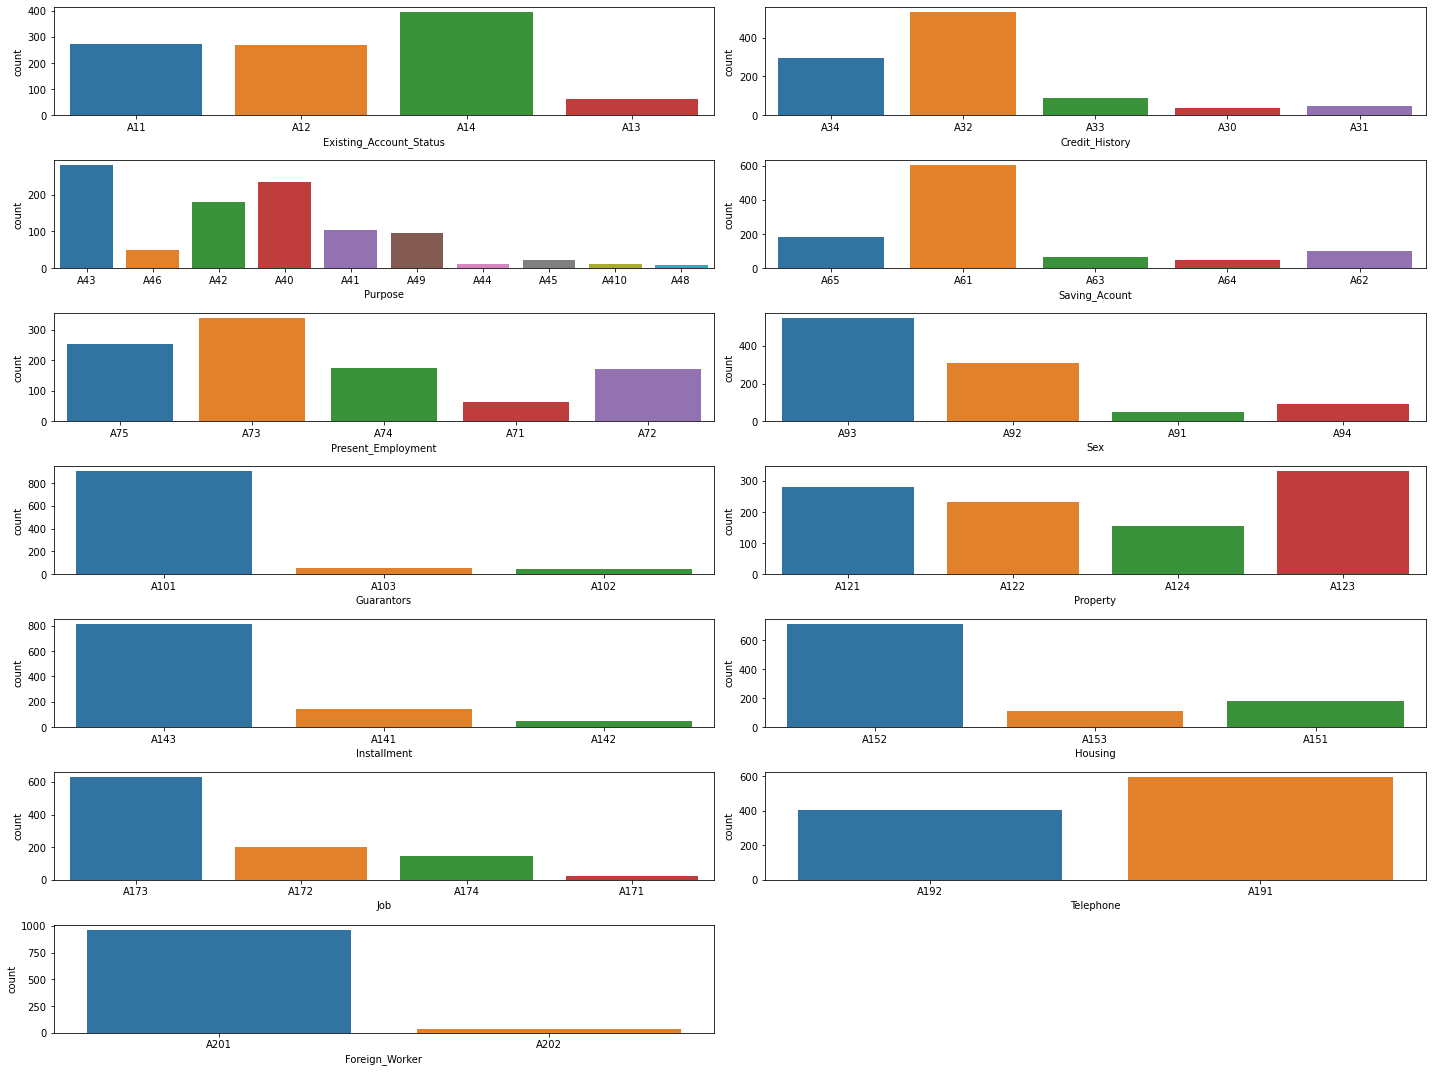

In [17]:
#count plots for categorical variables
c=1
fig = plt.figure(figsize=(20, 15))
for col in df_cat.columns:
    plt.subplot(7, 2, c)
    sns.countplot(df[col])
    c = c+1
plt.tight_layout()
plt.show()

### Bi-Variate analysis

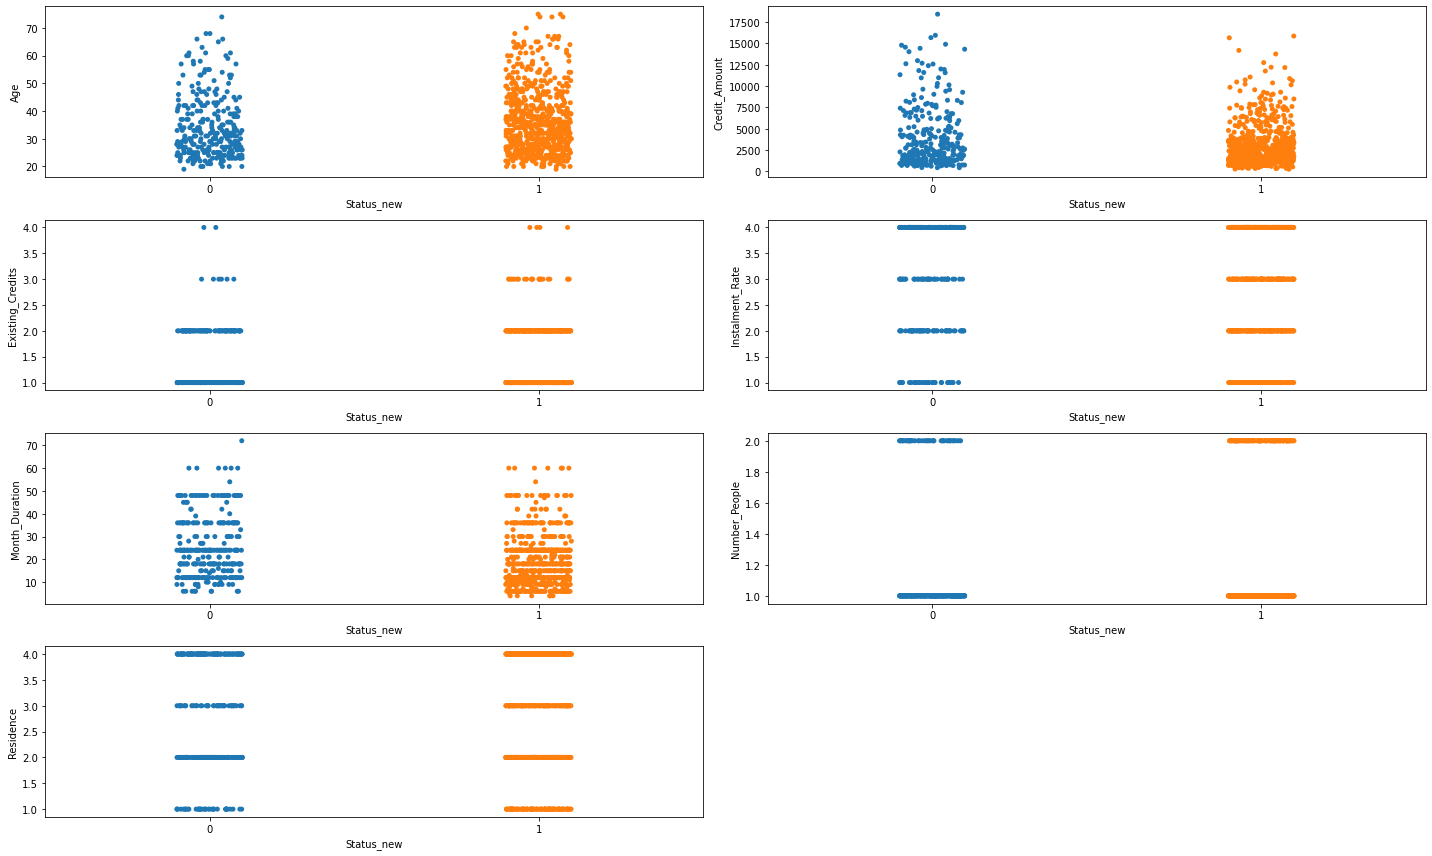

In [18]:
#strip plots for target vs discrete variables
c = 1
fig = plt.figure(figsize=(20, 12))
for col in df_num.columns.difference(['Status_new']):
    plt.subplot(4, 2, c)
    sns.stripplot(x='Status_new', y=col, data=df)
    c = c + 1

plt.tight_layout()
plt.show()

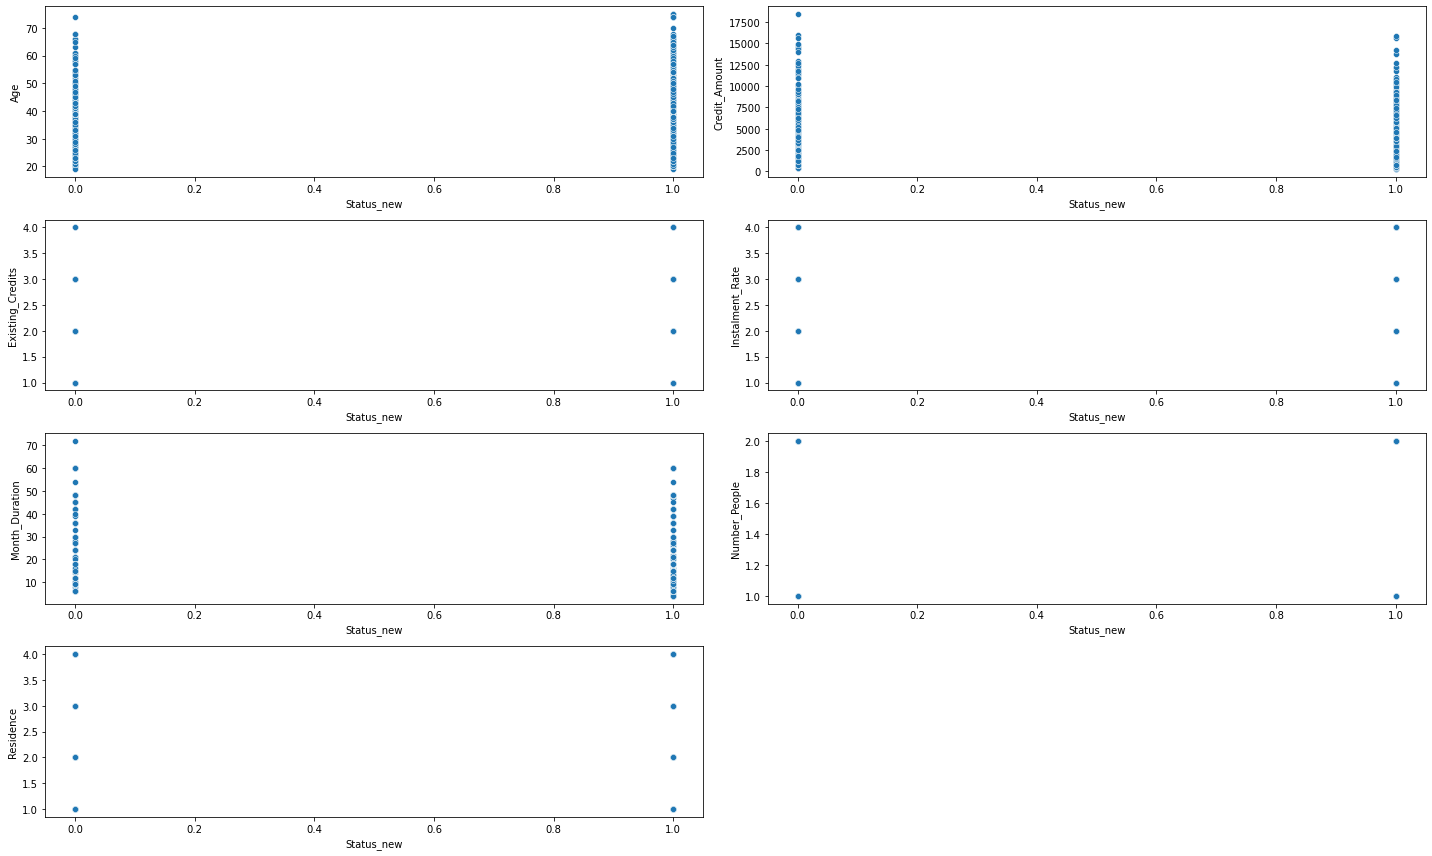

In [19]:
#scatter plots for target vs discrete variables
c = 1
fig = plt.figure(figsize=(20, 12))
for col in df_num.columns.difference(['Status_new']):
    plt.subplot(4, 2, c)
    sns.scatterplot(x='Status_new', y=col, data=df)
    c = c + 1

plt.tight_layout()
plt.show()

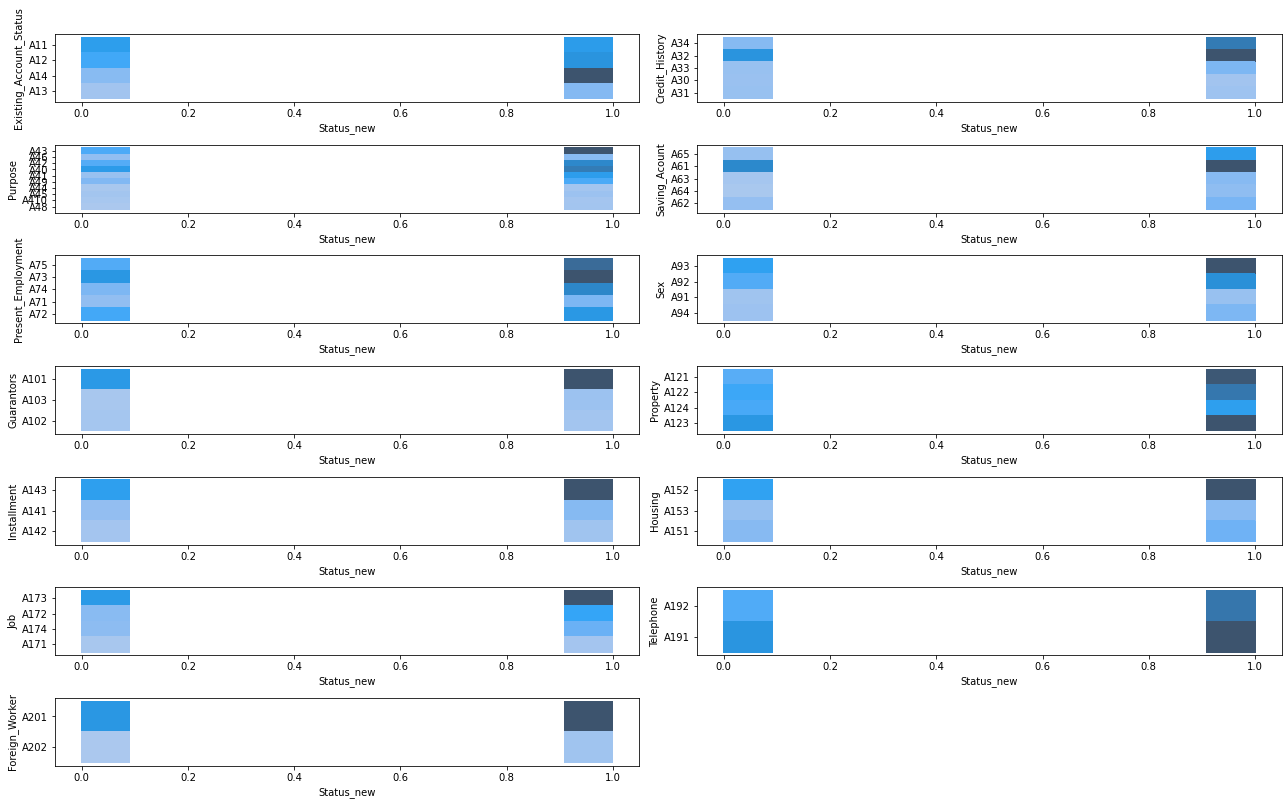

In [20]:
#histogram for target vs categorical variables
c = 1
fig = plt.figure(figsize=(18, 12))
for col in df_cat.columns:
    plt.subplot(8, 2, c)
    sns.histplot(x='Status_new', y=col, data=df)
    c = c + 1
plt.tight_layout()
plt.show()

### Multi-Variate analysis

<Figure size 1440x1296 with 0 Axes>

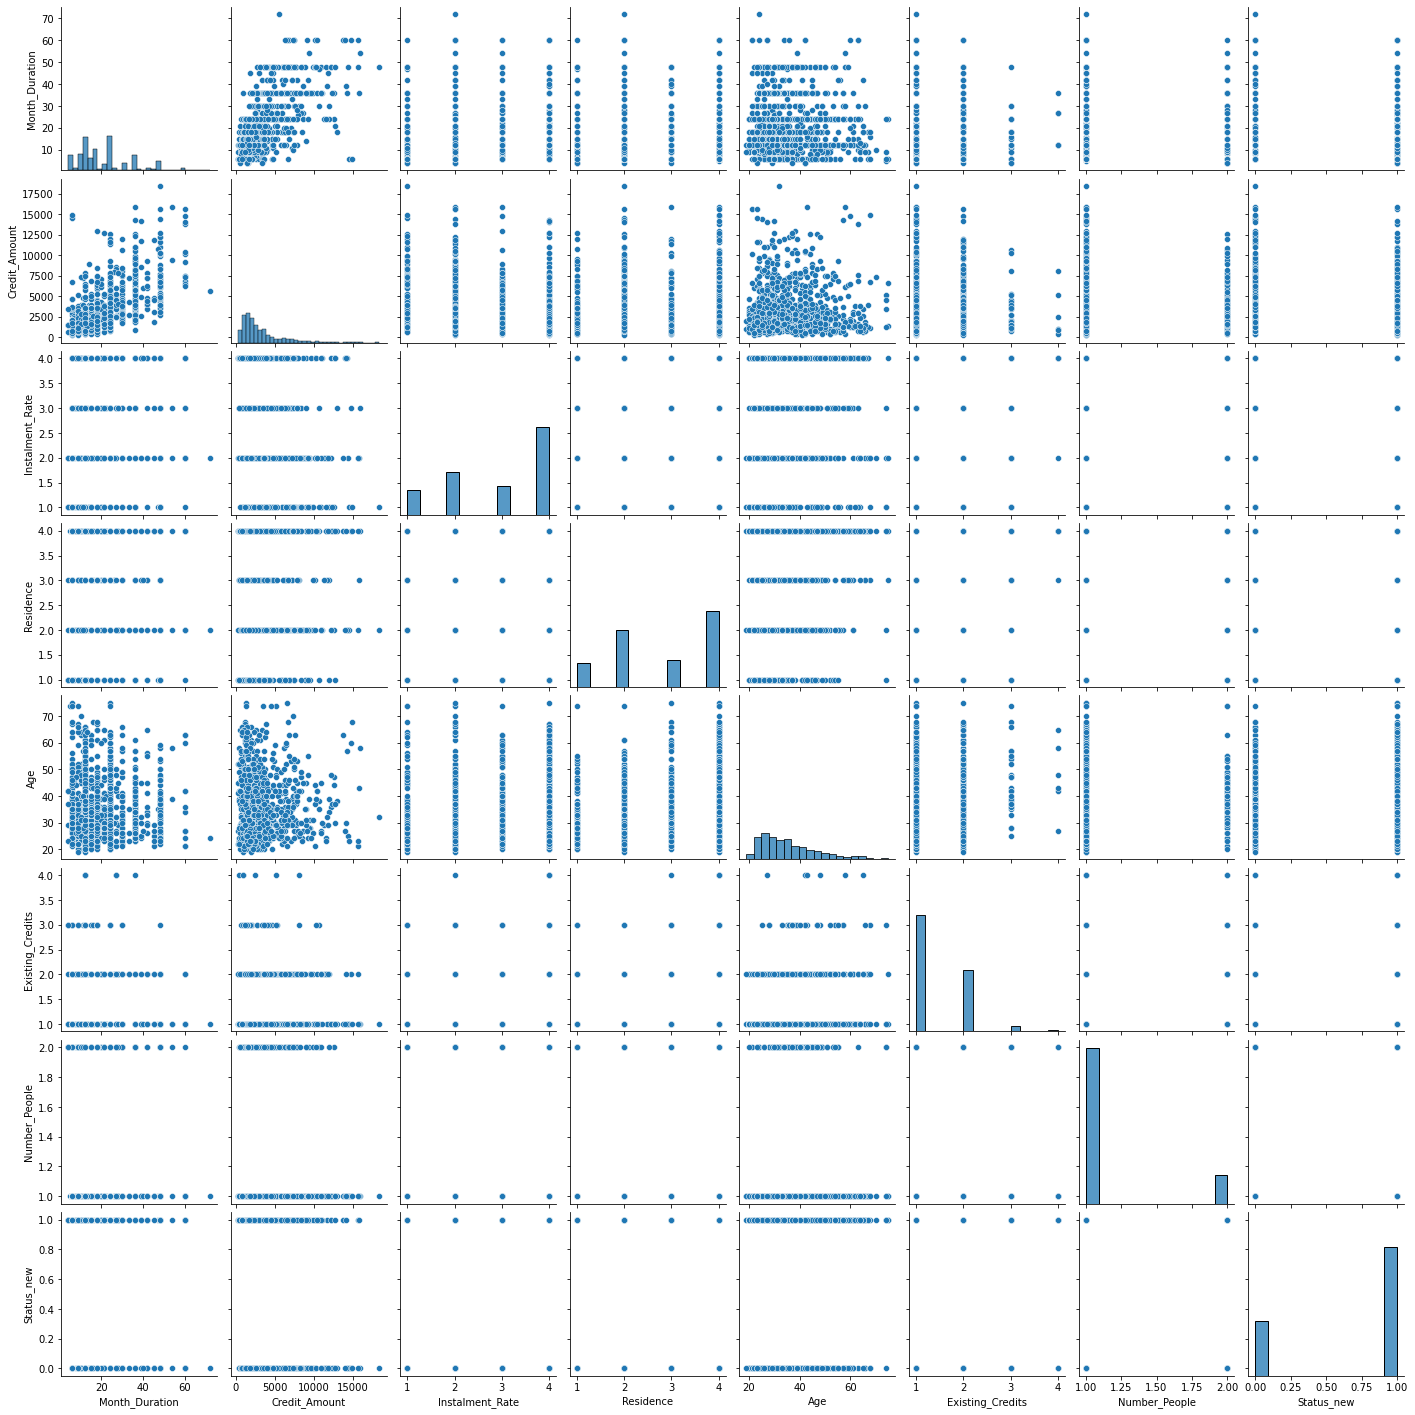

In [21]:
#pairwise relationship between different variables in the dataset
plt.figure(figsize=(20, 18))
sns.pairplot(df)
plt.show()

The histogram on the diagonal allows us to see the distribution of a single variable and 
the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

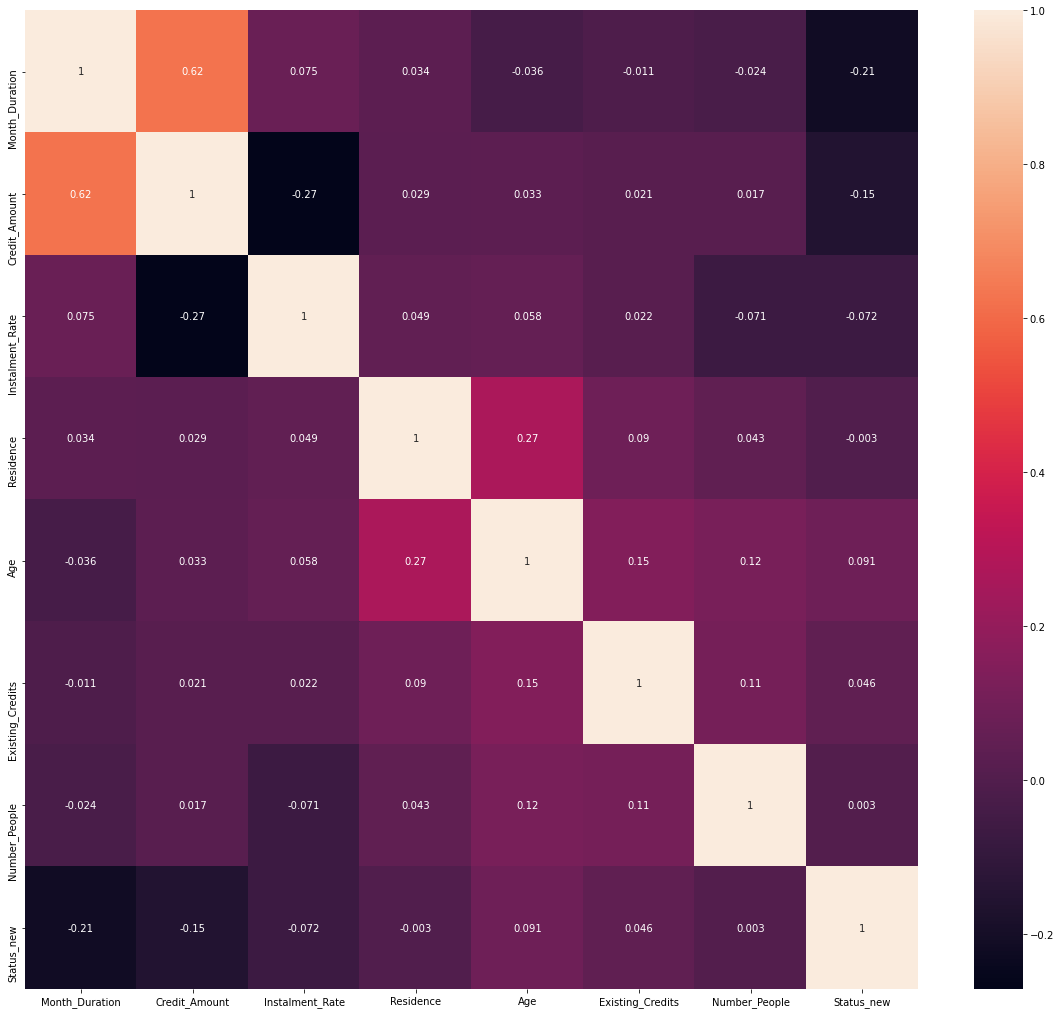

In [22]:
plt.figure(figsize=(20, 18))

df_corr = df.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True)
plt.show()

Credit_Amount and Month_Duration have a moderate +ve correlation. All other features dont show any correlation with others.

## Label Encoding  

We will convert categorical variable into integers.

In [23]:
df[df_cat.columns].head(5)

,Existing_Account_Status,Credit_History,Purpose,Saving_Acount,Present_Employment,Sex,Guarantors,Property,Installment,Housing,Job,Telephone,Foreign_Worker
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
for c in df_cat.columns:
    df[c] = le.fit_transform(df[c])

In [26]:
df[df_cat.columns]

,Existing_Account_Status,Credit_History,Purpose,Saving_Acount,Present_Employment,Sex,Guarantors,Property,Installment,Housing,Job,Telephone,Foreign_Worker
0,0,4,4,4,4,2,0,0,2,1,2,1,0
1,1,2,4,0,2,1,0,0,2,1,2,0,0
2,3,4,7,0,3,2,0,0,2,1,1,0,0
3,0,2,3,0,3,2,2,1,2,2,2,0,0
4,0,3,0,0,2,2,0,3,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,3,0,3,1,0,0,2,1,1,0,0
996,0,2,1,0,2,0,0,1,2,1,3,1,0
997,3,2,4,0,4,2,0,2,2,1,2,0,0
998,0,2,4,0,2,2,0,3,2,2,2,1,0


## Data-Scaling 

We will do scaling to bring all the feature values into the same scale.

In [27]:
cols = df.columns.difference(['Status_new'])
cols


Index(['Age', 'Credit_Amount', 'Credit_History', 'Existing_Account_Status',
       'Existing_Credits', 'Foreign_Worker', 'Guarantors', 'Housing',
       'Installment', 'Instalment_Rate', 'Job', 'Month_Duration',
       'Number_People', 'Present_Employment', 'Property', 'Purpose',
       'Residence', 'Saving_Acount', 'Sex', 'Telephone'],
      dtype='object')

In [28]:
df.head(5)

,Existing_Account_Status,Month_Duration,Credit_History,Purpose,Credit_Amount,Saving_Acount,Present_Employment,Instalment_Rate,Sex,Guarantors,...,Property,Age,Installment,Housing,Existing_Credits,Job,Number_People,Telephone,Foreign_Worker,Status_new
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,0
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,0


In [29]:
from sklearn.preprocessing import MinMaxScaler

#define min max scaler
scaler = MinMaxScaler()

In [30]:
#transform data
df_scaled = scaler.fit_transform(df[cols])

In [31]:
df_1 =pd.DataFrame(df_scaled, columns = cols)
df_1.shape

(1000, 20)

In [32]:
df_1.head(5)

,Age,Credit_Amount,Credit_History,Existing_Account_Status,Existing_Credits,Foreign_Worker,Guarantors,Housing,Installment,Instalment_Rate,Job,Month_Duration,Number_People,Present_Employment,Property,Purpose,Residence,Saving_Acount,Sex,Telephone
0,0.857143,0.050567,1.00,0.000000,0.333333,0.0,0.0,0.5,1.0,1.000000,0.666667,0.029412,0.0,1.00,0.000000,0.444444,1.000000,1.0,0.666667,1.0
1,0.053571,0.313690,0.50,0.333333,0.000000,0.0,0.0,0.5,1.0,0.333333,0.666667,0.647059,0.0,0.50,0.000000,0.444444,0.333333,0.0,0.333333,0.0
2,0.535714,0.101574,1.00,1.000000,0.000000,0.0,0.0,0.5,1.0,0.333333,0.333333,0.117647,1.0,0.75,0.000000,0.777778,0.666667,0.0,0.666667,0.0
3,0.464286,0.419941,0.50,0.000000,0.000000,0.0,1.0,1.0,1.0,0.333333,0.666667,0.558824,1.0,0.75,0.333333,0.333333,1.000000,0.0,0.666667,0.0
4,0.607143,0.254209,0.75,0.000000,0.333333,0.0,0.0,1.0,1.0,0.666667,0.666667,0.294118,1.0,0.50,1.000000,0.000000,1.000000,0.0,0.666667,0.0


## 4.Declare feature vector and target variable

In [33]:
X = df_1.values
X.shape


(1000, 20)

In [34]:
y = df['Status_new']
y.shape

(1000,)

## 5.Model Building

We will make a clustering model based on the features we already choose. We will try three clustering models, those are:

- K-Means
- Hierarchical Agglomerative Clustering
- DBSCAN

### 5.1 - KMeans Clustering

#### What is K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. A cluster refers to a collection of data points aggregated together because of certain similarities.
A cluster refers to a collection of data points aggregated together because of certain similarities.
We define a target number k, which refers to the number of centroids needed in the dataset. A centroid is the imaginary or real location representing the center of the cluster.
Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

#### How does K-means algorithm work?

- Given number of clusters k, it first selects k random point (may not be points in dataset) to be the k cluster centroids.
- Then we assign each point to the closest centroid and form k clusters.
- Once all points are assigned to a cluster, we then re-compute new centroids for each cluster.
- Then we reassign points to the closest centroid.
- If any reassignment takes place in step 4 we repeat steps 3 and 4. If no reassignment takes place then our model is ready and we have extracted k clusters from our dataset.


#### Stopping Criteria for K-Means Clustering

There are essentially three stopping criteria that can be adopted to stop the K-means algorithm:

- Centroids of newly formed clusters do not change
- Points remain in the same cluster
- Maximum number of iterations are reached

In [35]:
#fit kmeans model with clusters = 2
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,n_init = 10,max_iter=300,random_state=0)

In [36]:
km=kmeans.fit(X)
km

KMeans(n_clusters=2, random_state=0)

In [37]:
km.cluster_centers_

array([[ 3.31285361e-01,  2.18469127e-01,  6.53465347e-01,
         5.59405941e-01,  1.50990099e-01,  1.23762376e-02,
         5.07425743e-02,  4.97524752e-01,  8.29207921e-01,
         6.64191419e-01,  7.35973597e-01,  2.84034653e-01,
         1.48514851e-01,  6.18193069e-01,  5.36303630e-01,
         3.71012101e-01,  6.57590759e-01,  3.18069307e-01,
         5.68481848e-01,  1.00000000e+00],
       [ 2.71182886e-01,  1.30837493e-01,  6.24580537e-01,
         5.02796421e-01,  1.25279642e-01,  5.36912752e-02,
         8.72483221e-02,  4.42114094e-01,  8.43120805e-01,
         6.53243848e-01,  5.65995526e-01,  2.24536123e-01,
         1.59395973e-01,  5.80956376e-01,  3.95973154e-01,
         3.59433259e-01,  5.86129754e-01,  2.47902685e-01,
         5.55369128e-01, -1.49880108e-15]])

- The KMeans algorithm clusters data by trying to separate samples into n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, 
- It can be recognized as a measure of how internally coherent clusters are.
- A set of N samples X is divided into K disjoint clusters C, each described by the mean j of the samples in the cluster. 
- The means are known as the cluster centroids.
- The centroids are chosen that minimize the inertia, or within-cluster sum of squared criterion.

In [38]:
km.inertia_

1619.4395839267925

Inertia tells us how far the points within a cluster are. So, inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster. We calculate this for all the clusters and the final inertial value is the sum of all these distances. This distance within the clusters is known as intracluster distance. So, inertia gives us the sum of intracluster distances. Lower values of inertia are better and zero is optimal. 

We can see that the model has very high inertia, so this is not a good fit for the data.

In [39]:
#labels generated by the algorithm
labels = km.labels_
labels

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,

In [40]:
# check how many of the samples were correctly labeled
correctly_classified_labels = sum(y == labels)
correctly_classified_labels 

522

In [41]:
#accuracy 
correctly_classified_labels/(y.size)


0.522

This is a moderate classifier.

#### Use Elbow method to find optimal number of clusters

The spot where the SSE curve starts to bend is known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. The elbowpoint is the point where the rate of decrease of mean distance i.e. SSE will not change significantly with increase in number of clusters.

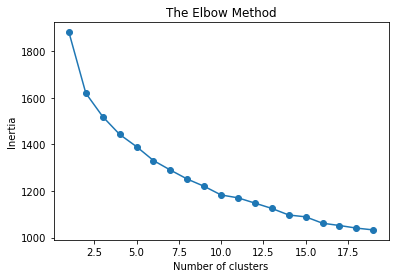

In [42]:
from sklearn.cluster import KMeans, MiniBatchKMeans
cs = []
for i in range(1, 20):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')   
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
    
plt.plot(range(1, 20), cs,marker='o')
plt.title('The Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel('Inertia')
plt.show()

As we can see there is a kink at k = 2, but we did not get a good classification accuracy with k=2, lets recreate the model with a different cluster size=3.

In [43]:
#fit kmeans model with clusters = 3
from sklearn.cluster import KMeans
km2 = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
km2.fit(X)
labels = kmeans.labels_

correct_labels = sum(y == labels)

In [44]:
correct_labels/float(y.size)

0.073

In [45]:
#store the K-means results in a dataframe
y_pred = km2.fit_predict(X)
y_pred

array([1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2,
       2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1,
       1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0,
       1, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 2, 1, 0,
       0, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,

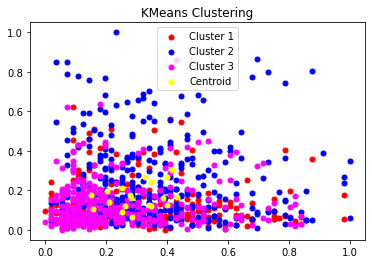

In [46]:
plt.scatter(X[y_pred == 0,0], X[y_pred==0,1], s=25, c='red', label='Cluster 1')
plt.scatter(X[y_pred == 1,0], X[y_pred==1,1], s=25, c='blue', label='Cluster 2')
plt.scatter(X[y_pred == 2,0], X[y_pred==2,1], s=25, c='magenta', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=25, c='yellow', label='Centroid')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [47]:
#look at the value count of points in each of the above-formed clusters:
fr = pd.DataFrame(X,columns=df_1.columns)
fr['cluster']=y_pred
fr['cluster'].value_counts()

1    404
2    328
0    268
Name: cluster, dtype: int64

So, there are 404 data points belonging to cluster 0, then 328 points in cluster 1, and so on.

#### Use silhoutte coefficient to find number of clusters

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

- Silhouette coefficient values range between -1 and 1. 
- Larger numbers indicate that samples are closer to their clusters than they are to other clusters.
- A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
- The worst value is -1. Values near 0 denote overlapping clusters.


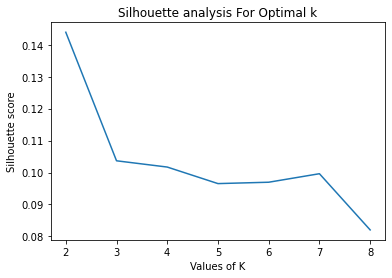

In [48]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Plotting the average silhouette scores for each k shows that the best choice for k is 2 since it has the maximum score.

We see that the silhouette score is maximized at k = 2. So, we will take 2 clusters. 

#### 5.2 - Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom.

There are two types of hierarchical clustering, Agglomerative and Divisive.
- Divisive Clustering : the type of hierarchical clustering that uses a top-down approach to make clusters. It uses an approach of the partitioning of 2 least similiar clusters and repeats this step until there is only one cluster. Divisive clustering is not commonly used in real life.
- Agglomerative Clustering : the type of hierarchical clustering which uses a bottom-up approach to make clusters. It uses an approach of the partitioning 2 most similiar clusters and repeats this step until there is only one cluster. These steps are how the agglomerative hierarchical clustering works:

#### How Hierarchial Agglomerative Clustering works?

For a set of N observations to be clustered:
- Start assigning each observation as a single point cluster, so that if we have N observations, we have N clusters, each containing just one observation.
- Find the closest (most similar) pair of clusters and make them into one cluster, we now have N-1 clusters.
- Find the two closest clusters and make them to one cluster. We now have N-2 clusters. This can be done using agglomerative clustering linkage techniques.
- Repeat steps 2 and 3 until all observations are clustered into one single cluster of size N.

#### Important terms

-  Proximity matrix:It contains the distance between each point. The distance can be calculated using Single Linkage, Complete Linkage, Average Linkage, Wards' method etc. 

- Dendogram:Dendrograms are tree diagrams frequently used to illustrate the arrangement of the clusters produced by hierarchical clustering. A subset of similiar data is created in a tree-like structure in which the root node corresponds to entire data and branches are created from the root node to form several clusters. The optimal number of clusters is equal to the number of vertical lines going through the horizontal line.

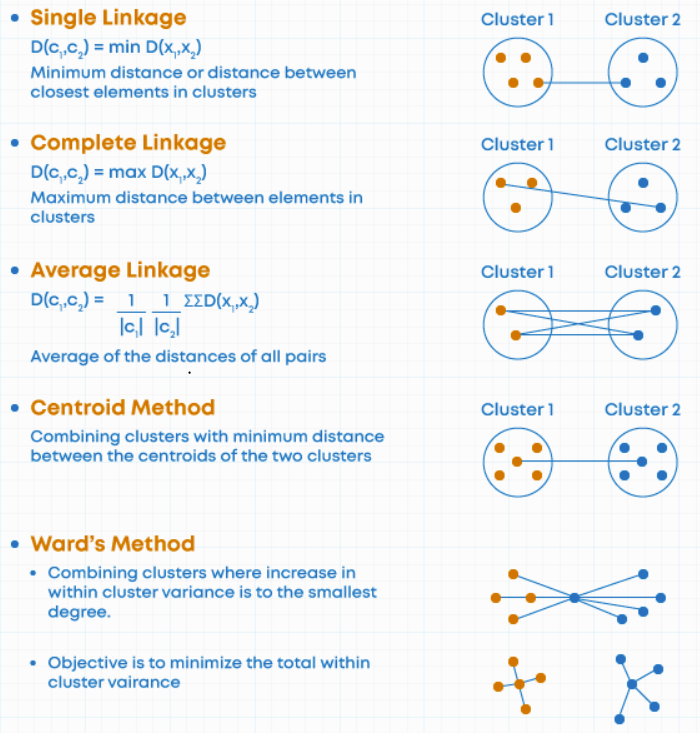

This model uses dendogram to determine the n_clusters. 


In [49]:
#!pip install scipy

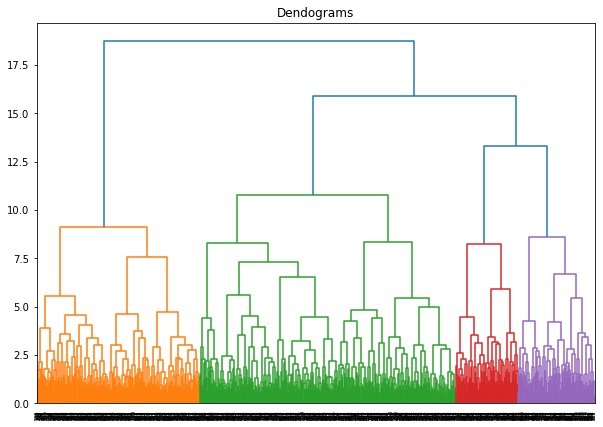

In [50]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10,7))
plt.title("Dendograms")
dend = sch.dendrogram(sch.linkage(X,method='ward'))
plt.show()

We can clearly visualize the steps of hierarchical clustering. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

The x-axis contains the samples and y-axis represents the distance between these samples.

The vertical line with maximum distance is the outermost blue line and hence we can decide a threshold of 11 and cut the dendrogram.

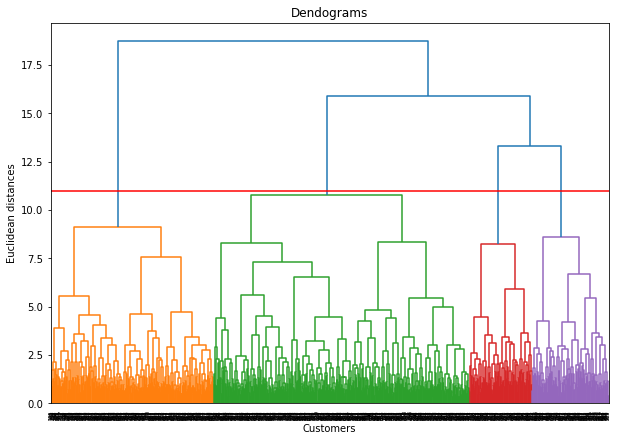

In [51]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10,7))
plt.title("Dendograms")
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dend = sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=11,color='r',linestyle='solid')
plt.show()

We have 4 clusters as this line cuts the dendrogram at two points. 

Let’s now apply hierarchical clustering for 4 clusters

In [52]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
labels = hc.fit_predict(X)
labels

array([1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 2, 1, 2,
       2, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 0, 3, 0, 3, 0, 1, 0, 3, 1, 2, 0,
       3, 0, 0, 1, 0, 0, 3, 1, 0, 1, 3, 2, 1, 0, 0, 1, 3, 0, 1, 1, 1, 2,
       3, 0, 3, 0, 3, 1, 3, 3, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 1, 1, 2, 3, 0, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       3, 3, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 0,
       1, 0, 2, 3, 3, 2, 2, 0, 1, 3, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 3,
       0, 0, 2, 0, 0, 1, 2, 1, 3, 0, 3, 1, 0, 3, 1, 2, 2, 0, 0, 1, 1, 3,
       3, 1, 1, 0, 0, 0, 2, 3, 1, 0, 3, 0, 2, 1, 1, 1, 1, 0, 3, 1, 0, 1,
       0, 1, 3, 2, 1, 0, 3, 1, 0, 3, 0, 0, 0, 0, 2, 2, 1, 3, 0, 2, 3, 2,
       2, 0, 2, 1, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 3,
       2, 2, 0, 3, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 3, 0, 1, 1,
       2, 1, 0, 0, 1, 1, 3, 0, 2, 1, 0, 0, 1, 1, 1,

We can see the values of 0s,1s,2s and 3s in the output since we defined 4 clusters. 0 represents the points that belong to the first cluster, 1 represents points in the second cluster and so on. 

Let’s now visualize the 4 clusters.


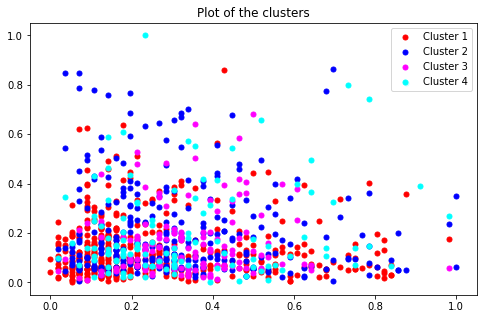

In [53]:
plt.figure(figsize = (8,5))
#plt.scatter(X_new[:,0], X_new[:,1],c=labels, cmap='rainbow')
plt.scatter(X[labels == 0 , 0] , X[labels == 0 , 1] , s=25, c='red', label='Cluster 1')
plt.scatter(X[labels == 1 , 0] , X[labels == 1 , 1] , s=25, c='blue', label='Cluster 2')
plt.scatter(X[labels == 2 , 0] , X[labels == 2 , 1] , s=25, c='magenta', label='Cluster 3')
plt.scatter(X[labels == 3, 0] , X[labels == 3 , 1] , s=25, c = 'cyan', label='Cluster 4')
plt.title('Plot of the clusters')
plt.legend()
plt.show()

#### 5.3 - DBSCAN Clustering

Density-based clustering algorithms are very effienct at finding high-density regions and outliers. It is very important to detect outliers for some task, e.g. anomaly detection.  DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. For a given set of data points, the DBSCAN algorithm clusters together those points that are close to each other based on any distance metric and a minimum number of points.

#### What is DBSCAN algorithm?

DBSCAN Clustering Algorithm requires two parameters:

DBSCAN can identify clusters in a large spatial dataset by looking at the local density of corresponding elements. DBSCAN can determine which data points are noise or outliers. DBSCAN can identify points that are not part of any cluster (very useful as outliers detector). But it slower than agglomerative clustering and k-means, but still scales to relatively large datasets.

There are two parameters in DBSCAN: 

- eps: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered to be neighbors.

- minPoints: the minimum number of data points to form a dense region/ cluster. 

#### How does DBSCAN algorithm work?

- The algorithm starts with an arbitrary point which has not been visited and its neighborhood information is retrieved from the epsparameter.
- If this point contains minPoints within epsneighborhood, cluster formation starts. Otherwise the point is labeled as noise. This point can be later found within the epsneighborhood of a different point and, thus can be made a part of the cluster.
- If a point is found to be a core point then the points within the eps neighborhood is also part of the cluster. So all the points found within eps neighborhood are added, along with their own eps neighborhood, if they are also core points.
- The above process continues until the density-connected cluster is completely found.
- The process restarts with a new point which can be a part of a new cluster or labeled as noise.

#### How to choose the Min Points?

- Remove the outlier
- Take the min Points to be greater or equal to the dimensionality (d) of our dataset
- Take the min Points twice of the dimensionality of data
- If the dataset is noisier, choose a larger value of min Points
- Choosing the min Points process is creally depends a lot on domain knowledge

#### How to determine eps?

- We choose a min Points = 3, for each point p, we’ll compute “d”, where d = distance from p to the 3rd nearest neighbor of p. If d is high, then the chance of p is noisy is also high.

- For each point of the dataset, we’ll have our d’s. Then, we’ll sort all d’s in increasing order. Now, we’ll plot the sorted point index and d’s with elbow or Knee method.


In [54]:
from sklearn.cluster import DBSCAN
#compute DBSCAN
db = DBSCAN()
db.fit(X)
db_labels = db.labels_
db_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

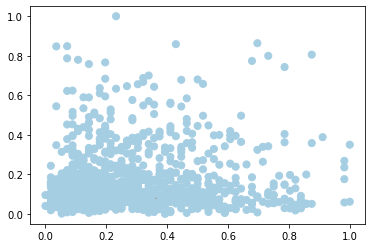

In [55]:
#plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=db_labels,s=50,cmap='Paired')
plt.show()


All the data points are now of blue color which means they are treated as noise. It is because the value of epsilon is very small and we didn’t optimize parameters. Therefore, we need to find the value of epsilon and minPoints and then train our model again.

For epsilon, we are using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

In [56]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

The distance variable contains an array of distances between a data point and its nearest data point for all data points in the dataset.

We can plot our K-distance graph and find the value of epsilon.

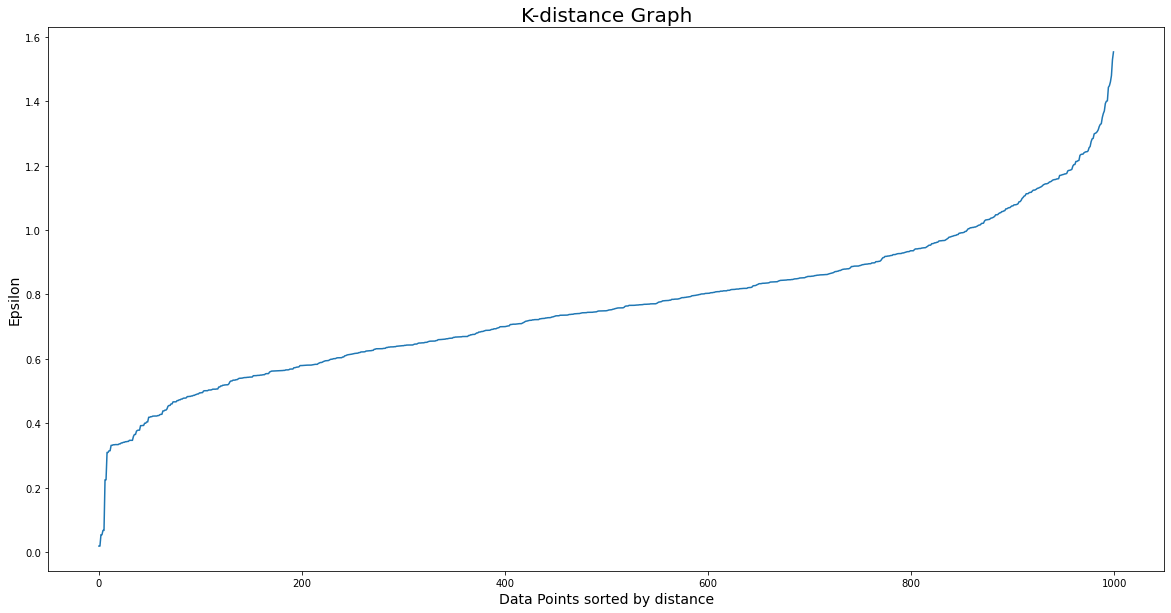

In [57]:
#plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 1.2 in this case.

The value of minPoints also depends on domain knowledge. This time we are taking minPoints as 3

In [58]:
db2 = DBSCAN(eps=1.2,min_samples=3)
db2.fit(X)
db2_labels = db2.labels_
db2_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

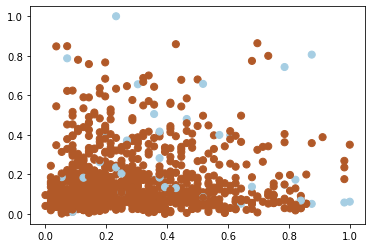

In [59]:
#plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=db2_labels,s=50,cmap='Paired')
plt.show()

From the figure above we can see that DBSCAN is not suitable for this dataset.

## 6.Results

From these models, we can choose the most well segmented model, that is k-means. We use the clusters from the that model to analyze the dataset.

In [60]:
original_df  = pd.DataFrame(df,columns=df_1.columns)
original_df['cluster']=fr['cluster']
original_df

,Age,Credit_Amount,Credit_History,Existing_Account_Status,Existing_Credits,Foreign_Worker,Guarantors,Housing,Installment,Instalment_Rate,...,Month_Duration,Number_People,Present_Employment,Property,Purpose,Residence,Saving_Acount,Sex,Telephone,cluster
0,67,1169,4,0,2,0,0,1,2,4,...,6,1,4,0,4,4,4,2,1,1
1,22,5951,2,1,1,0,0,1,2,2,...,48,1,2,0,4,2,0,1,0,2
2,49,2096,4,3,1,0,0,1,2,2,...,12,2,3,0,7,3,0,2,0,0
3,45,7882,2,0,1,0,2,2,2,2,...,42,2,3,1,3,4,0,2,0,2
4,53,4870,3,0,2,0,0,2,2,3,...,24,2,2,3,0,4,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1736,2,3,1,0,0,1,2,3,...,12,1,3,0,3,4,0,1,0,0
996,40,3857,2,0,1,0,0,1,2,4,...,30,1,2,1,1,4,0,0,1,1
997,38,804,2,3,1,0,0,1,2,4,...,12,1,4,2,4,4,0,2,0,0
998,23,1845,2,0,1,0,0,2,2,4,...,45,1,2,3,4,4,0,2,1,1


In [61]:
#get the cluster-wise mean values for all features
data_clustered_kmeans = original_df.assign(Cluster=labels)
groupeddata_kmeans = data_clustered_kmeans.groupby(['Cluster']).mean().round(2)
groupeddata_kmeans

,Age,Credit_Amount,Credit_History,Existing_Account_Status,Existing_Credits,Foreign_Worker,Guarantors,Housing,Installment,Instalment_Rate,...,Month_Duration,Number_People,Present_Employment,Property,Purpose,Residence,Saving_Acount,Sex,Telephone,cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,33.44,2595.87,2.53,1.50,1.35,0.04,0.22,0.84,1.88,3.02,...,19.34,1.00,2.30,1.13,3.27,2.78,1.00,1.62,0.02,1.12
1,36.78,4038.15,2.68,1.73,1.40,0.01,0.04,0.95,1.92,3.05,...,22.92,1.00,2.41,1.57,3.37,2.95,1.25,1.67,1.00,1.00
2,37.92,3250.68,2.58,1.59,1.50,0.08,0.16,1.03,1.69,2.77,...,19.96,2.00,2.55,1.27,3.03,2.83,1.26,1.89,0.31,1.03
3,38.05,4065.17,2.21,1.46,1.53,0.02,0.09,1.14,0.14,2.84,...,23.22,1.15,2.48,1.83,3.39,2.85,0.96,1.71,0.51,1.00


We can see that the clusters segmented well.

## 7.Conclusion

After comparing three kind of clustering models, we decided to use k-means as the model. The data was divided into 4 clusters
which can be used to determine the creditworthiness of the German Credit customers. Each of the cluster have their own mean characteristics.